# Harmonic oscillator - RK2 implicit method implemention

The 1D equation of motion of pendulum is given by:

$$ \frac{d^2 x(t)}{dt^2} = \ddot{x}(t)= -k x(t)$$

decomposing into 1st order, coupled differential equation:

$$\dot{x} = v $$,
$$\dot{v} = -k x$$,

which are then solved numerically by implicit RK2 method with initial conditions:

$$x_1(t) \rightarrow x(0) = 1, \dot{x}(0) = 0$$

The implicit RK2 method is defined as:

$$ y_{n+1} = y_n +\frac{h}{2}(k_1 + k_2) $$

where,

$$ k_1 = f \left( t_n + \left( \frac{1}{2} + \frac{\sqrt{3}}{6} \right) h , y_n + \frac{1}{4}h k_1 + \left( \frac{1}{4} + \frac{\sqrt{3}}{6}\right) h k_2 \right) $$,

$$ k_2 = f \left( t_n + \left( \frac{1}{2} - \frac{\sqrt{3}}{6} \right) h , y_n + \frac{1}{4}h k_2 + \left( \frac{1}{4} - \frac{\sqrt{3}}{6}\right) h k_1 \right)$$

Let $\gamma_+ = \left( \frac{1}{4} + \frac{\sqrt{3}}{6}\right)$ and $\gamma_- = \left( \frac{1}{4} - \frac{\sqrt{3}}{6}\right)$. Hence,

$$x_{n+1} = x_n + \frac{h}{2}(k_1 + k_2)$$,
$$v_{n+1} = v_n + \frac{h}{2}(k_1 + k_2)$$,
$$ k_{1x} = v_n + \frac{1}{4}h k_1 + \gamma_+ h k_2 $$,
$$ k_{2x} = v_n + \frac{1}{4}h k_2 + \gamma_- h k_1 $$,
$$ k_{1v} = -k x_n + \frac{1}{4}h k_1 + \gamma_+ h k_2 $$,
$$ k_{2v} = -k x_n + \frac{1}{4}h k_2 + \gamma_- h k_1 $$.


Solving the above given set of linear equations yields:

$$k_{1x} = \left( v_n + \frac{\gamma_+ h v_n}{1 - 0.25 h} \right) \left( 1 -0.25 h - \frac{\gamma_+ \gamma_- h^2} {1 - 0.25 h} \right)^{-1}$$,

$$ k_{2x} = \frac{v_n + \gamma_- h k_{1x}}{1 -0.25 h} $$,

$$k_{1v} = \left( -k x_n - \frac{\gamma_+ h k x_n}{1 - 0.25 h} \right) \left( 1 -0.25 h - \frac{\gamma_+ \gamma_- h^2} {1 - 0.25 h} \right)^{-1}$$,

$$ k_{2v} = \frac{-k x_n + \gamma_- h k_{1v}}{1 -0.25 h} $$.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

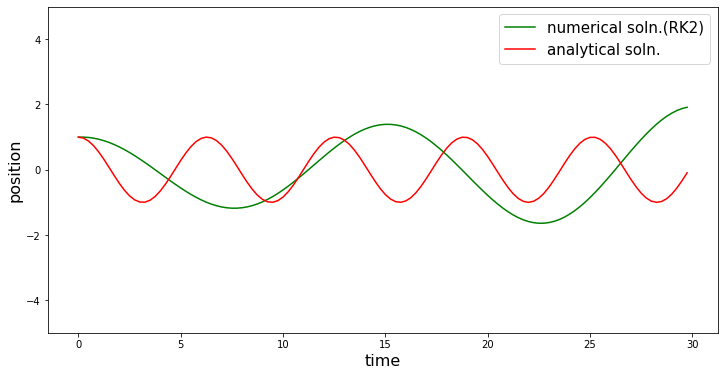

In [2]:
T = np.arange(0,30,0.25) # (initial time, final time + 1, time step size)
X = np.zeros(len(T))
V = np.zeros(len(T))
h = 0.1  # step size
X[0] = 1 # initial position x(t)=x(0)=1
V[0] = 0 # initial velocity
km = 1 # k/m ratio or w^2


gamma_p = 1/4 + np.sqrt(3)/6
gamma_m = 1/4 - np.sqrt(3)/6

def RK2_implicit(x,v,h):
    k1x = (v + gamma_p*h*v/(1-0.25*h))*(1 - 0.25*h - (gamma_p*gamma_m*h**2)/(1 - 0.25*h) )**(-1)
    k2x = (v + gamma_m*h*k1x)/(1-0.25*h)
    k1v = (-km*x - gamma_p*h*km*x/(1-0.25*h))*(1 - 0.25*h - (gamma_p*gamma_m*h**2)/(1 - 0.25*h) )**(-1)
    k2v = (-km*x + gamma_m*h*k1v)/(1-0.25*h)
    xn = x + h/2*(k1x+k2x)
    vn = v + h/2*(k1v+k2v)
    return xn, vn

for i in range (len(T)-1):
    X[i+1],V[i+1] = RK2_implicit(X[i],V[i],h)

    

# Analytic solution: x = A*cos(w*t) + B*sin(w*t)
X_a = np.zeros(len(T))
# with inital conditions x(t)=x(0)=1 and v(t)=v(0)=0:
A = 1 
B = 0
w = 1 # angular velocity

# Calculating analytical solution for array of time - t:
X_a = A*np.cos(w*T) + B*np.sin(w*T)
V_a = -A*np.sin(w*T) + B*np.cos(w*T)
E_a = np.zeros(len(T))
E_a = 0.5*1*((X_a*X_a) + (V_a*V_a)) #Energy for analytical soln; mass m, spring constant k, =1
E = np.zeros(len(T))
E =  0.5*1*((X*X) + (V*V)) #Energy for numerical soln; mass m, spring constant k, =1

#plot numerical and analytical solutions - position/displacement:
plt.figure(figsize=(12,6))
plt.ylim(-5,5)
plt.xlabel("time",fontsize=16)
plt.ylabel("position",fontsize=16)
plt.plot(T,X,color ='green')
plt.plot(T,X_a,color ='red')
plt.legend(["numerical soln.(RK2)","analytical soln."],fontsize=15)
plt.show()

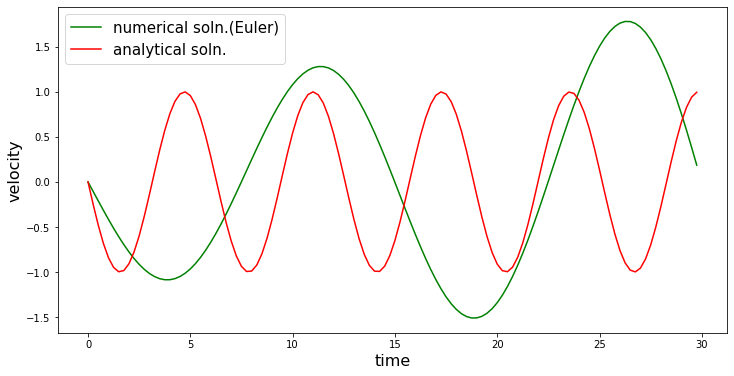

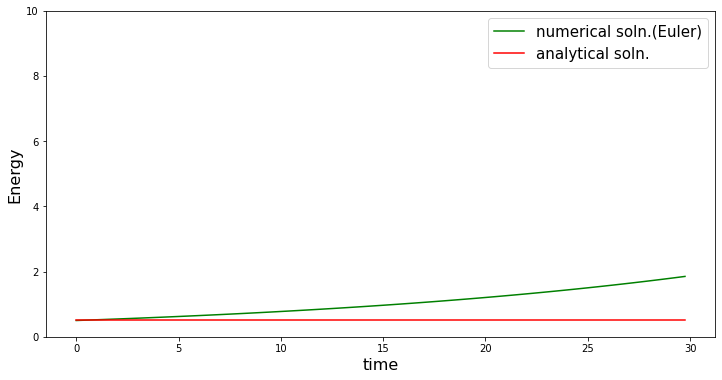

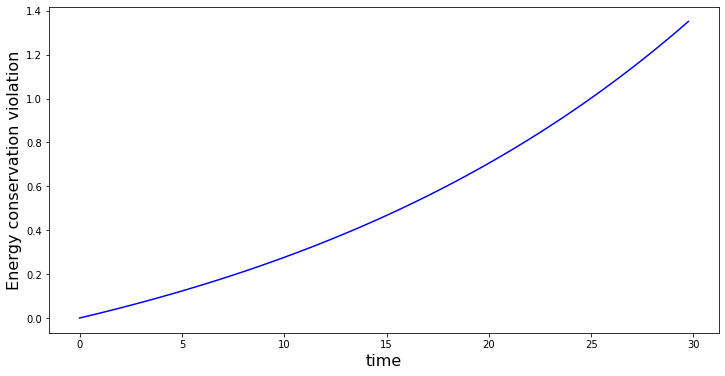

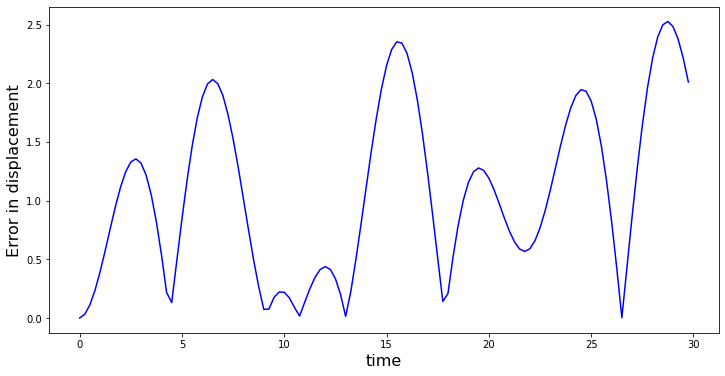

In [3]:
#plot numerical and analytical solutions - velocity:
plt.figure(figsize=(12,6))
#plt.ylim(-5,5)
plt.xlabel("time",fontsize=16)
plt.ylabel("velocity",fontsize=16)
plt.plot(T,V,color ='green')
plt.plot(T,V_a,color ='red')
plt.legend(["numerical soln.(Euler)","analytical soln."],fontsize=15)
plt.show()

#plot numerical and analytical solutions - Energy:
plt.figure(figsize=(12,6))
plt.ylim(0,10)
plt.xlabel("time",fontsize=16)
plt.ylabel("Energy",fontsize=16)
plt.plot(T,E,color ='green')
plt.plot(T,E_a,color ='red')
plt.legend(["numerical soln.(Euler)","analytical soln."],fontsize=15)
plt.show()

#Error calculation:

delX = np.sqrt((X - X_a)*(X - X_a))
delE = np.sqrt((E - E_a)*(E - E_a))
#plot delta Energy:
plt.figure(figsize=(12,6))
#plt.ylim(0,1)
plt.xlabel("time",fontsize=16)
plt.ylabel("Energy conservation violation",fontsize=16)
plt.plot(T,delE,color ='blue')
plt.show()

#plot delta displacement:
plt.figure(figsize=(12,6))
#plt.ylim(0,1)
plt.xlabel("time",fontsize=16)
plt.ylabel("Error in displacement",fontsize=16)
plt.plot(T,delX,color ='blue')
plt.show()